In [25]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [19]:
# Importing dataset
df = pd.read_csv('C:/Users/User/Documents/movies.csv')

In [21]:
# Quick view on the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [4]:
# Checking the presence of missing data
df.isnull().sum()

# alternative
# for col in df.columns:
    # pct_missing = np.mean(df[col].isnull())
    # print('{} : {}%'.format(col,pct_missing))

name         0
rating      12
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      1
budget       0
gross        0
company      2
runtime      1
dtype: int64

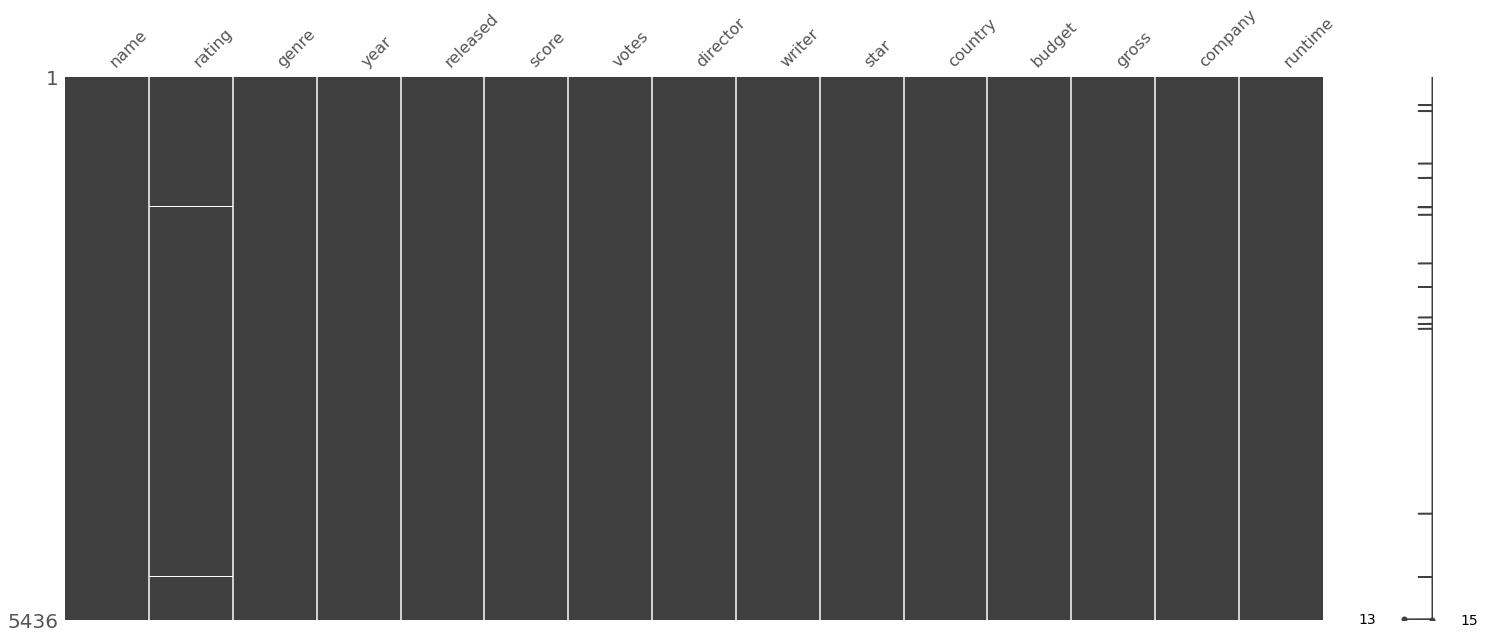

In [22]:
# Visualizing and understanding missing data
import missingno as msno
msno.matrix(df)
plt.show()

In [6]:
df.dtypes

name         object
rating       object
genre        object
year         object
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [7]:
# Remove .0 from budget and gross
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [8]:
# Sort the data based on gross and show every row
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3743,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
5316,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
1802,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
4743,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
5172,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,Philadelphia Experiment II,PG-13,Action,1994,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
2295,Ginger Snaps,Not Rated,Drama,2001,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
154,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0
1379,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


In [9]:
# Check the presenece of duplicates
df[df.duplicated(subset = ['name', 'year', 'director'], keep = False)].sort_values(by = "name") # No duplicates detected

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


Text(0, 0.5, 'Gross Earnings')

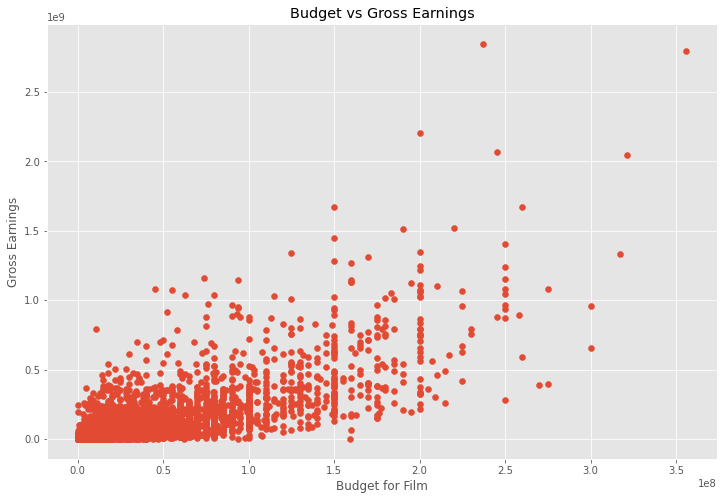

In [23]:
# Investigating the correlation between budget and gross
# Scatter plot with budget vs gross

plt.scatter(x = df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

<AxesSubplot:xlabel='budget', ylabel='gross'>

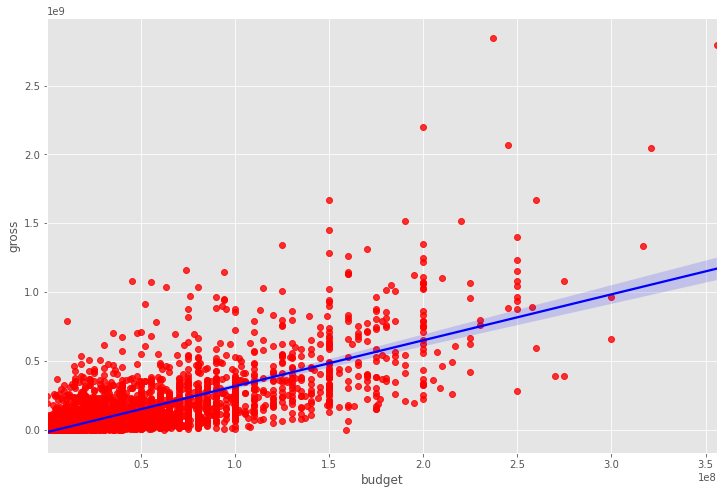

In [26]:
# Plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data = df, scatter_kws={'color': 'red'}, line_kws={'color':'blue'})

In [12]:
df.corr(method = 'pearson')

,score,votes,budget,gross,runtime
score,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.414580,0.352437,0.318595,0.275596,1.000000


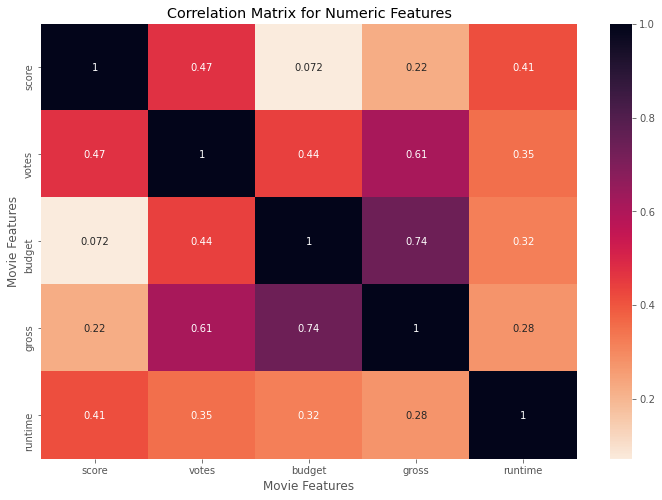

In [13]:
# Visualizing the correlation between numeric features
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True, cmap= "rocket_r")
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [14]:
# Include the other features in the correlation test
# Convert object into categorical code
df_numerized = df

for col_name in df_numerized:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4706,6,6,1,1308,8.4,927000,1800,2841,700,46,19000000,46998772,1432,146.0
1,3943,6,1,1,1131,5.8,65000,1581,1160,215,47,4500000,58853106,454,104.0
2,3654,4,0,1,1363,8.7,1200000,759,1822,1161,47,18000000,538375067,949,124.0
3,205,4,4,1,1131,7.7,221000,891,1416,1478,47,3500000,83453539,1114,88.0
4,734,6,4,1,1174,7.3,108000,721,352,272,47,6000000,39846344,1089,98.0


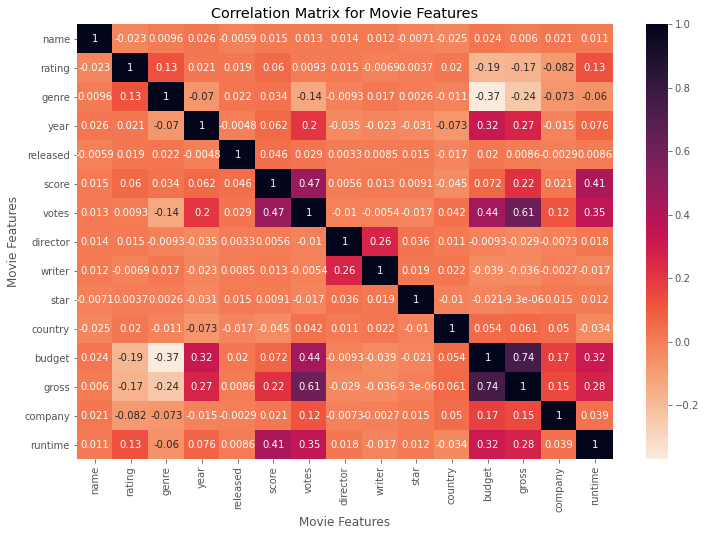

In [15]:
# Visualzing correlation between all movie features
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True, cmap= "rocket_r")
plt.title('Correlation Matrix for Movie Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [16]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
pd.set_option('display.max_rows', None)
sorted_pairs = corr_pairs.sort_values(ascending = False)
sorted_pairs

runtime   runtime     1.000000
company   company     1.000000
rating    rating      1.000000
genre     genre       1.000000
year      year        1.000000
released  released    1.000000
score     score       1.000000
votes     votes       1.000000
writer    writer      1.000000
star      star        1.000000
country   country     1.000000
budget    budget      1.000000
gross     gross       1.000000
director  director    1.000000
name      name        1.000000
gross     budget      0.740395
budget    gross       0.740395
votes     gross       0.614904
gross     votes       0.614904
votes     score       0.473809
score     votes       0.473809
votes     budget      0.440021
budget    votes       0.440021
score     runtime     0.414580
runtime   score       0.414580
          votes       0.352437
votes     runtime     0.352437
year      budget      0.321550
budget    year        0.321550
          runtime     0.318595
runtime   budget      0.318595
          gross       0.275596
gross   

In [17]:
high_corr = sorted_pairs[sorted_pairs.between(0.5, 1, inclusive = False)]
high_corr

gross   budget    0.740395
budget  gross     0.740395
votes   gross     0.614904
gross   votes     0.614904
dtype: float64

In conclusion, there are strong correlation between budget and gross as well as votes and gross. Budget and votes are the factors affecting the gross earnings of a movie.